In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

In [4]:
path=(r"C:\Users\raghu\Desktop\Internship\PART 2\LSTM")
dir_list=os.listdir(path)
print(dir_list)

['.ipynb_checkpoints', 'city_day.csv', 'city_hour.csv', 'city_week.xlsx', 'FINNNNNNNNNNNNN.ipynb', 'LSTM hour.ipynb', 'stations.csv', 'station_day.csv', 'station_hour.csv']


In [5]:
df= pd.read_csv(r"C:\Users\raghu\Desktop\Internship\PART 2\city_day.csv",parse_dates=True)


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df=df[['City','Date','AQI']]

In [8]:
delhi = df[df['City'] == 'Delhi']
delhi.drop(['City'],axis=1,inplace = True)
delhi.set_index('Date', inplace = True)

In [9]:
delhi['AQI'].fillna(method = 'bfill',inplace = True)

In [10]:
delhi=delhi.astype('float64')
delhi=delhi.resample(rule='MS').mean()

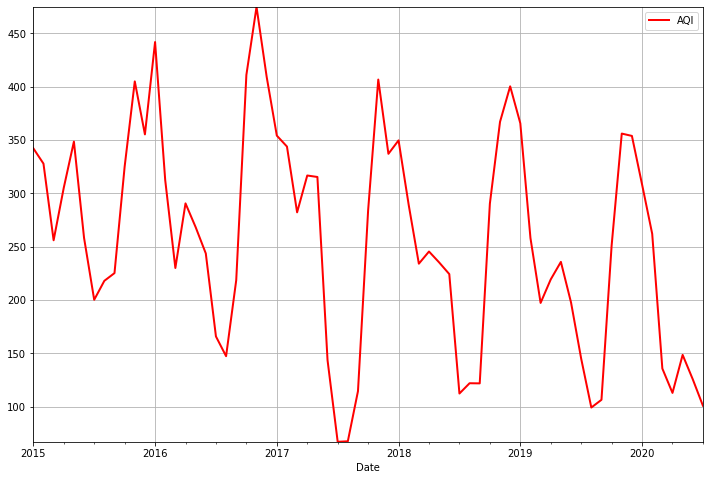

In [11]:
ax=delhi[['AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

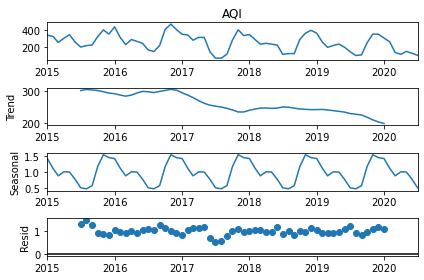

In [13]:
delhi_AQI=delhi['AQI']
result=seasonal_decompose(delhi_AQI,model='multiplicative')
result.plot();

In [14]:
train=delhi[:48]
test=delhi[48:61]

In [15]:
type(train)

pandas.core.frame.DataFrame

In [16]:
print("Shape of train data:" + str(train.shape))
print("Shape of test data:" + str(test.shape))

Shape of train data:(48, 1)
Shape of test data:(13, 1)


In [17]:
train_arr = train
test_arr = test

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_arr)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train_arr)
scaled_test = scaler.transform(test_arr)

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [21]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.67487834 0.63964965 0.46337057 0.58406109 0.6903082  0.46893587
 0.32655914 0.37015839 0.38790668 0.63246601 0.82878394 0.70684585]
Predict this y: 
 [[0.91922402]]


In [22]:
#Importing the necessary components to define our model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [23]:
model = Sequential(name = 'LSTM-Model')
model.add(LSTM(32, activation='relu', return_sequences = True, input_shape=(n_input, n_features),name = "LSTM_1"))
#model.add(LSTM(100, activation='relu', return_sequences = True,name = "LSTM_2"))
#model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu',name = "LSTM_2"))
#model.add(Dropout(0.2))
#model.add(Dense(8))
model.add(Dense(1,name = "DENSE_1"))
model.compile(optimizer= 'adam',  loss='mse')

model.summary()

Model: "LSTM-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, 12, 32)            4352      
                                                                 
 LSTM_2 (LSTM)               (None, 32)                8320      
                                                                 
 DENSE_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Plotting the layer structure
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,rankdir="TB",dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
model.fit_generator(generator,epochs=200)

Epoch 1/200
36/36 [==============================] - 4s 12ms/step - loss: 0.2097
Epoch 2/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0766
Epoch 3/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0931
Epoch 4/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0786
Epoch 5/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0782
Epoch 6/200
36/36 [==============================] - 0s 10ms/step - loss: 0.0740
Epoch 7/200
36/36 [==============================] - 0s 10ms/step - loss: 0.0750
Epoch 8/200
36/36 [==============================] - 0s 8ms/step - loss: 0.0775
Epoch 9/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0768
Epoch 10/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0686
Epoch 11/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0661
Epoch 12/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0700
Epoch 13/200
36/36 [==========

36/36 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 103/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0108
Epoch 104/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 105/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0098
Epoch 106/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0115
Epoch 107/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 108/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 109/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 110/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 111/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0143
Epoch 112/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 113/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 114/200
36/36 [=========

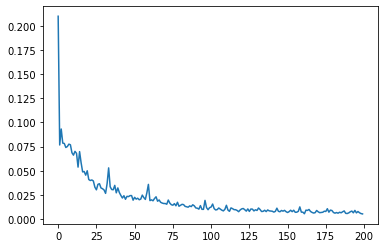

In [26]:
#plotting the loss vs #of epoch 
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [27]:
df= pd.read_csv(r"C:\Users\raghu\Desktop\Internship\PART 2\LSTM\city_hour.csv",parse_dates=True)


In [28]:
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
df=df[['City','Date','AQI']]

In [30]:
delhi = df[df['City'] == 'Delhi']
delhi.drop(['City'],axis=1,inplace = True)
delhi.set_index('Date', inplace = True)

In [31]:
delhi['AQI'].fillna(method = 'bfill',inplace = True)

In [32]:
delhi=delhi.astype('float64')
delhi=delhi.resample(rule='MS').mean()

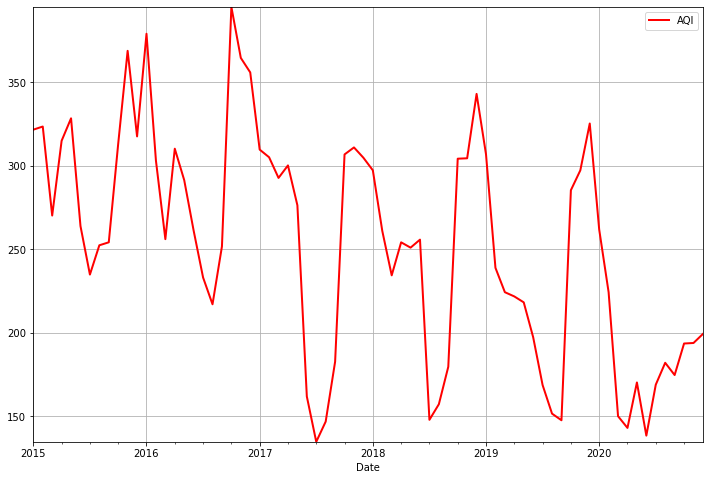

In [33]:
ax=delhi[['AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

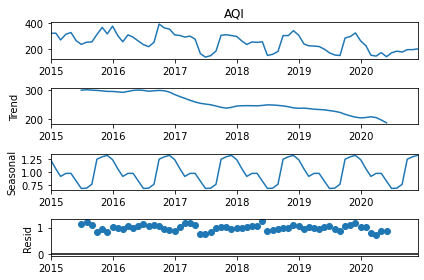

In [35]:
delhi_AQI=delhi['AQI']
result=seasonal_decompose(delhi_AQI,model='multiplicative')
result.plot();

In [36]:
#Hourly data splitted into testing and training
train=delhi[:48]
test=delhi[48:61]

In [37]:
type(train)

pandas.core.frame.DataFrame

In [38]:
print("Shape of train data:" + str(train.shape))
print("Shape of test data:" + str(test.shape))

Shape of train data:(48, 1)
Shape of test data:(13, 1)


In [39]:
train_arr = train
test_arr = test

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_arr)

MinMaxScaler()

In [41]:
scaled_train = scaler.transform(train_arr)
scaled_test = scaler.transform(test_arr)

In [42]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [43]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.71777566 0.72495406 0.52030247 0.69217973 0.74385664 0.49608049
 0.38456063 0.45188995 0.45872191 0.68544061 0.8990031  0.7022407 ]
Predict this y: 
 [[0.93827759]]


In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [45]:
model = Sequential(name = 'LSTM-Model')
model.add(LSTM(32, activation='relu', return_sequences = True, input_shape=(n_input, n_features),name = "LSTM_1"))
#model.add(LSTM(100, activation='relu', return_sequences = True,name = "LSTM_2"))
#model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu',name = "LSTM_2"))
#model.add(Dropout(0.2))
#model.add(Dense(8))
model.add(Dense(1,name = "DENSE_1"))
model.compile(optimizer= 'adam',  loss='mse')

model.summary()

Model: "LSTM-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, 12, 32)            4352      
                                                                 
 LSTM_2 (LSTM)               (None, 32)                8320      
                                                                 
 DENSE_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [46]:
#Plotting the layer structure
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,rankdir="TB",dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [47]:
model.fit_generator(generator,epochs=200)

Epoch 1/200
36/36 [==============================] - 2s 7ms/step - loss: 0.2707
Epoch 2/200
36/36 [==============================] - 0s 7ms/step - loss: 0.1237
Epoch 3/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0897
Epoch 4/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0703
Epoch 5/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0677
Epoch 6/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0669
Epoch 7/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0702
Epoch 8/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0673
Epoch 9/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0658
Epoch 10/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0662
Epoch 11/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0674
Epoch 12/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0661
Epoch 13/200
36/36 [=================

36/36 [==============================] - 0s 6ms/step - loss: 0.0119
Epoch 103/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0110
Epoch 104/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0144
Epoch 105/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0164
Epoch 106/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0150
Epoch 107/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 108/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 109/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0146
Epoch 110/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0109
Epoch 111/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0115
Epoch 112/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0112
Epoch 113/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 114/200
36/36 [=========

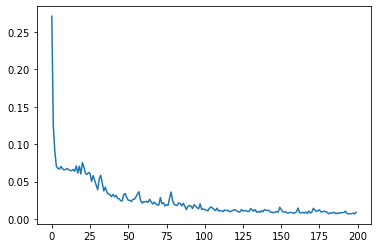

In [48]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [49]:
df= pd.read_csv(r"C:\Users\raghu\Desktop\Internship\PART 2\station_day1.csv",parse_dates=True)


In [50]:
df['Date'] = pd.to_datetime(df['Date'])

In [51]:
df=df[['City','Date','AQI']]

In [52]:
delhi = df[df['City'] == 'Delhi']
delhi.drop(['City'],axis=1,inplace = True)
delhi.set_index('Date', inplace = True)

In [53]:
delhi['AQI'].fillna(method = 'bfill',inplace = True)

In [54]:
delhi=delhi.astype('float64')
delhi=delhi.resample(rule='MS').mean()

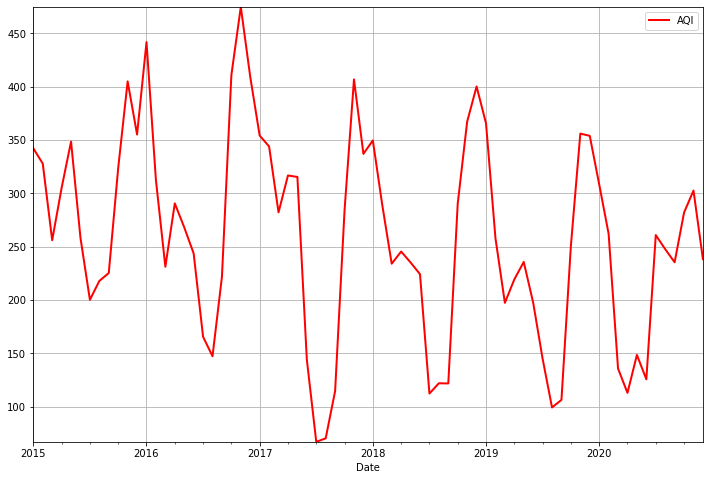

In [55]:
ax=delhi[['AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [57]:
train=delhi[:48]
test=delhi[48:61]


In [58]:
type(train)

pandas.core.frame.DataFrame

In [59]:
print("Shape of train data:" + str(train.shape))
print("Shape of test data:" + str(test.shape))

Shape of train data:(48, 1)
Shape of test data:(13, 1)


In [60]:
train_arr = train
test_arr = test

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_arr)

MinMaxScaler()

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_arr)

MinMaxScaler()

In [63]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [64]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.71777566 0.72495406 0.52030247 0.69217973 0.74385664 0.49608049
 0.38456063 0.45188995 0.45872191 0.68544061 0.8990031  0.7022407 ]
Predict this y: 
 [[0.93827759]]


In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [66]:
model = Sequential(name = 'LSTM-Model')
model.add(LSTM(32, activation='relu', return_sequences = True, input_shape=(n_input, n_features),name = "LSTM_1"))
#model.add(LSTM(100, activation='relu', return_sequences = True,name = "LSTM_2"))
#model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu',name = "LSTM_2"))
#model.add(Dropout(0.2))
#model.add(Dense(8))
model.add(Dense(1,name = "DENSE_1"))
model.compile(optimizer= 'adam',  loss='mse')

model.summary()

Model: "LSTM-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, 12, 32)            4352      
                                                                 
 LSTM_2 (LSTM)               (None, 32)                8320      
                                                                 
 DENSE_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [67]:
#Plotting the layer structure
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,rankdir="TB",dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [68]:
model.fit_generator(generator,epochs=200)

Epoch 1/200
36/36 [==============================] - 3s 12ms/step - loss: 0.1905
Epoch 2/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0814
Epoch 3/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0837
Epoch 4/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0697
Epoch 5/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0707
Epoch 6/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0693
Epoch 7/200
36/36 [==============================] - 0s 10ms/step - loss: 0.0688
Epoch 8/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0661
Epoch 9/200
36/36 [==============================] - 0s 12ms/step - loss: 0.0728
Epoch 10/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0707
Epoch 11/200
36/36 [==============================] - 0s 10ms/step - loss: 0.0722
Epoch 12/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0709
Epoch 13/200
36/36 [======

36/36 [==============================] - 0s 6ms/step - loss: 0.0185
Epoch 103/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0166
Epoch 104/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0195
Epoch 105/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0154
Epoch 106/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0160
Epoch 107/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0175
Epoch 108/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0150
Epoch 109/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0204
Epoch 110/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0171
Epoch 111/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0179
Epoch 112/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 113/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0204
Epoch 114/200
36/36 [=========

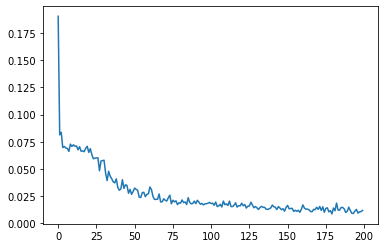

In [69]:
#plotting the loss vs #of epoch 
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [70]:
df= pd.read_csv(r"C:\Users\raghu\Desktop\Internship\PART 2\stations.csv",parse_dates=True)


In [71]:
df['Date'] = pd.to_datetime(df['Date'])

In [72]:
df=df[['City','Date','AQI']]

In [73]:
delhi = df[df['City'] == 'Delhi']
delhi.drop(['City'],axis=1,inplace = True)
delhi.set_index('Date', inplace = True)

In [74]:
delhi['AQI'].fillna(method = 'bfill',inplace = True)

In [75]:
delhi=delhi.astype('float64')
delhi=delhi.resample(rule='MS').mean()

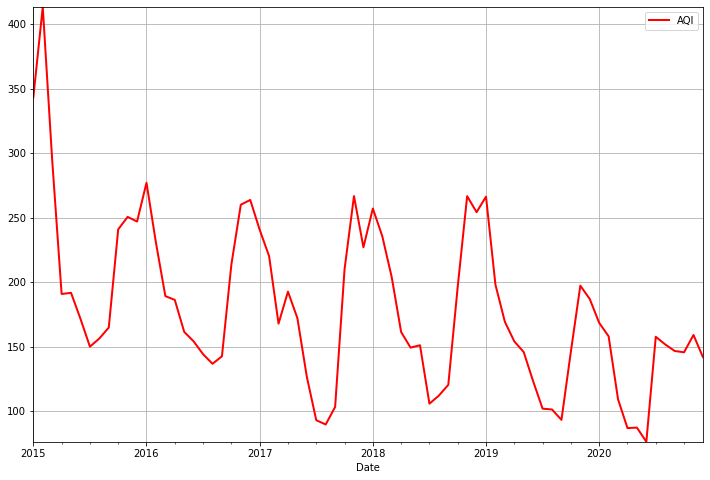

In [76]:
ax=delhi[['AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [78]:
train=delhi[:48]
test=delhi[48:61]

In [79]:
type(train)

pandas.core.frame.DataFrame

In [80]:
print("Shape of train data:" + str(train.shape))
print("Shape of test data:" + str(test.shape))

Shape of train data:(48, 1)
Shape of test data:(13, 1)


In [81]:
train_arr = train
test_arr = test

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_arr)

MinMaxScaler()

In [83]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [84]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.71777566 0.72495406 0.52030247 0.69217973 0.74385664 0.49608049
 0.38456063 0.45188995 0.45872191 0.68544061 0.8990031  0.7022407 ]
Predict this y: 
 [[0.93827759]]


In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [86]:
model = Sequential(name = 'LSTM-Model')
model.add(LSTM(32, activation='relu', return_sequences = True, input_shape=(n_input, n_features),name = "LSTM_1"))
#model.add(LSTM(100, activation='relu', return_sequences = True,name = "LSTM_2"))
#model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu',name = "LSTM_2"))
#model.add(Dropout(0.2))
#model.add(Dense(8))
model.add(Dense(1,name = "DENSE_1"))
model.compile(optimizer= 'adam',  loss='mse')

model.summary()

Model: "LSTM-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, 12, 32)            4352      
                                                                 
 LSTM_2 (LSTM)               (None, 32)                8320      
                                                                 
 DENSE_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [87]:
#Plotting the layer structure
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,rankdir="TB",dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [89]:
model.fit_generator(generator,epochs=200)

Epoch 1/200
36/36 [==============================] - 1s 19ms/step - loss: 0.1201
Epoch 2/200
36/36 [==============================] - 1s 15ms/step - loss: 0.0832
Epoch 3/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0694
Epoch 4/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0671
Epoch 5/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0706
Epoch 6/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0735
Epoch 7/200
36/36 [==============================] - 0s 12ms/step - loss: 0.0725
Epoch 8/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0696
Epoch 9/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0660
Epoch 10/200
36/36 [==============================] - 0s 11ms/step - loss: 0.0661
Epoch 11/200
36/36 [==============================] - 0s 10ms/step - loss: 0.0673
Epoch 12/200
36/36 [==============================] - 0s 9ms/step - loss: 0.0629
Epoch 13/200
36/36 [======

36/36 [==============================] - 0s 6ms/step - loss: 0.0140
Epoch 103/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0193
Epoch 104/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0158
Epoch 105/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0160
Epoch 106/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 107/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0145
Epoch 108/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0158
Epoch 109/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0215
Epoch 110/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0152
Epoch 111/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0151
Epoch 112/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0174
Epoch 113/200
36/36 [==============================] - 0s 6ms/step - loss: 0.0208
Epoch 114/200
36/36 [=========

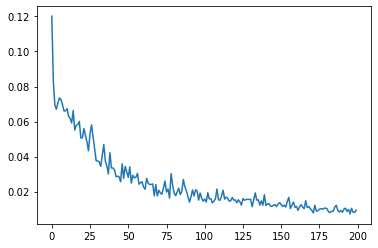

In [90]:
#plotting the loss vs #of epoch 
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [91]:
#Predicting using our model on the testing dataset
test_predictions = []

first_batch = scaled_train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
      
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


In [92]:
test_predictions = scaler.inverse_transform(test_predictions)

In [93]:
print(test_predictions.shape)
print(test_arr.shape)

(13, 1)
(13, 1)


In [94]:
test_arr['Predictions'] = test_predictions

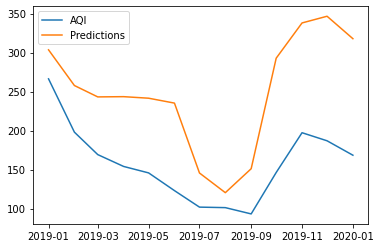

In [95]:
plt.plot(test_arr['AQI'],label = 'AQI')
plt.plot(test_arr['Predictions'],label = 'Predictions')

plt.legend()